In [13]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold

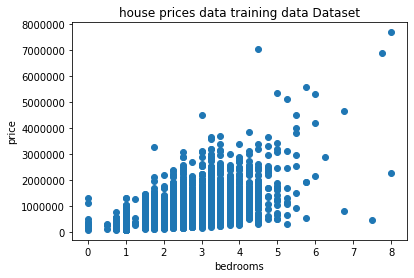

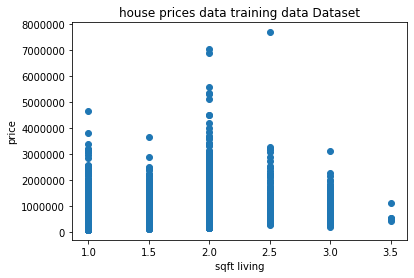

In [14]:
data = pd.read_csv("house_prices_data_training_data.csv")
fig, ax = plt.subplots()
fig, living = plt.subplots()

ax.scatter(data['bathrooms'], data['price'])
ax.set_title('house prices data training data Dataset')
ax.set_xlabel('bedrooms')
ax.set_ylabel('price')

living.scatter(data['floors'], data['price'])
living.set_title('house prices data training data Dataset')
living.set_xlabel('sqft living')
living.set_ylabel('price')

price=data['price'].values[0:10799]
data=data.drop(['date','price'],axis=1)
train = data.values[0:10799]


In [15]:
print(train)

[[ 7.12930052e+09  3.00000000e+00  1.00000000e+00 ... -1.22257000e+02
   1.34000000e+03  5.65000000e+03]
 [ 6.41410019e+09  3.00000000e+00  2.25000000e+00 ... -1.22319000e+02
   1.69000000e+03  7.63900000e+03]
 [ 5.63150040e+09  2.00000000e+00  1.00000000e+00 ... -1.22233000e+02
   2.72000000e+03  8.06200000e+03]
 ...
 [ 9.54240008e+09  4.00000000e+00  2.00000000e+00 ... -1.22173000e+02
   2.51000000e+03  1.10410000e+04]
 [ 3.22306906e+09  2.00000000e+00  1.75000000e+00 ... -1.22060000e+02
   1.62000000e+03  1.12384000e+05]
 [ 1.72450003e+09  4.00000000e+00  2.50000000e+00 ... -1.22339000e+02
   1.71000000e+03  7.90900000e+03]]


In [16]:
#Normalizing the data



data_norm = abs(np.subtract(train,train.mean(axis=0)))
data_norm = np.divide(data_norm,train.max(axis=0))
print(data_norm.shape)
ones = np.ones((data_norm.shape[0],1))
data_norm = np.hstack((ones,data_norm))

(10799, 19)


In [17]:
theta=np.zeros(20)

In [18]:
def computeH(data_norm, theta):
    H = np.dot(data_norm,theta)
    return H

In [19]:
H=computeH(data_norm,theta)
print(data_norm)


[[ 1.00000000e+00  2.62962140e-01  3.29239239e-02 ... -3.54528546e-04
   1.03932155e-01  8.67489410e-03]
 [ 1.00000000e+00  1.90296169e-01  3.29239239e-02 ... -8.65594778e-04
   4.66490123e-02  6.39183625e-03]
 [ 1.00000000e+00  1.10782259e-01  1.23833015e-01 ... -1.56696456e-04
   1.21927092e-01  5.90629906e-03]
 ...
 [ 1.00000000e+00  5.08138514e-01  5.79851670e-02 ... -3.37883769e-04
   8.75572070e-02  2.48687757e-03]
 [ 1.00000000e+00  1.33919813e-01  1.23833015e-01 ... -1.26934319e-03
   5.81056408e-02  1.13838880e-01]
 [ 1.00000000e+00  2.86177817e-01  5.79851670e-02 ... -1.03045485e-03
   4.33756899e-02  6.08191889e-03]]


In [20]:
def computeCost(X, y, theta):
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    H = np.dot(X,theta)
    s = np.subtract(H,y)
    p = np.power(s,2.0)
    m = np.multiply(2,m)
    J = np.divide(np.sum(p),m)
    # ===========================================================
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=np.divide(alpha,m)
        sumofh0x=np.dot(X,theta)
        theta=np.subtract(theta,((np.divide(alpha,m))*(np.dot(X.T,sumofh0x-y))))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

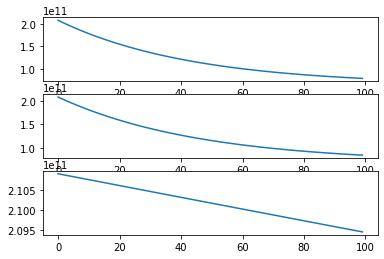

In [21]:
iterations = 100
alpha = 0.01

theta, J_history = gradientDescent(data_norm ,price, theta, alpha, iterations) #1st hypothesis
data_norm1=np.delete(data_norm, np.s_[6:20], axis=1)
theta1=np.zeros(6)
theta1, J_history1 = gradientDescent(data_norm1 ,price, theta1, alpha, iterations) #2nd hypothesis

x1=np.power(data_norm[0:10799,2],1.0) 
x2=np.power(data_norm[0:10799,3],2.0)
x3=np.power(data_norm[0:10799,4],3.0)
x4=np.power(data_norm[0:10799,5],4.0)
x1=x1.reshape(10799,1)
x2=x2.reshape(10799,1)
x3=x3.reshape(10799,1)
x4=x4.reshape(10799,1)
data_norm2=np.hstack((x1,x2,x3,x4))
theta2=np.zeros(4)
theta2, J_history2 = gradientDescent(data_norm2 ,price, theta2, alpha, iterations) #3rd hypothesis

plt.subplot(3,1,1)
plt.plot(np.arange(iterations),J_history)
plt.subplot(3,1,2)
plt.plot(np.arange(iterations),J_history1)
plt.subplot(3,1,3)
plt.plot(np.arange(iterations),J_history2)


In [22]:
def computeCostReg(X, y, theta, lambda_):
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    H = np.dot(X,theta)
    s = np.subtract(H,y)
    p = np.power(s,2.0)
    m = np.multiply(2,m)
    J1= np.divide(np.sum(p),m)
    R1=np.divide(lambda_, m)
    R2=sum(np.power(theta,2.0))
    J2=np.dot(R1,R2)
    J=np.add(J1,J2)
    # ===========================================================
    return J


def gradientDescentReg(X, y, theta, lambda_, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCostReg(X, y, theta, lambda_))
    

    return theta, J_history

[ 3.62208716e+05  7.22353310e+04  5.18865611e+04  1.35443276e+05
  1.87375846e+05  1.33095366e+04  8.99999390e+04  1.53543764e+05
  3.75826848e+05  5.71290933e+04  1.85868244e+05  2.05805813e+05
  1.54216395e+05  1.24171688e+04  1.46940509e+05  1.63993235e+01
 -2.47882448e+03 -4.65410124e+01  2.02206704e+05  1.38093586e+04]


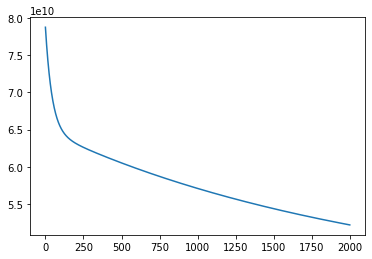

In [23]:
lambda_ = 0.5
alpha = 0.01
iterations = 2000
new_theta, J_history = gradientDescentReg(data_norm, price, theta, lambda_, alpha, iterations)
print(new_theta)
plt.plot(np.arange(iterations),J_history)

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 3600  3601  3602 ... 10796 10797 10798] TEST: [   0    1    2 ... 3597 3598 3599]
Train Cost : 52646921224.76964
Test Cost : 45778514402.97203
TRAIN: [    0     1     2 ... 10796 10797 10798] TEST: [3600 3601 3602 ... 7197 7198 7199]
Train Cost : 51465035493.06387
Test Cost : 48151676493.14636
TRAIN: [   0    1    2 ... 7197 7198 7199] TEST: [ 7200  7201  7202 ... 10796 10797 10798]
Train Cost : 52369310852.1632
Test Cost : 46202316864.52697


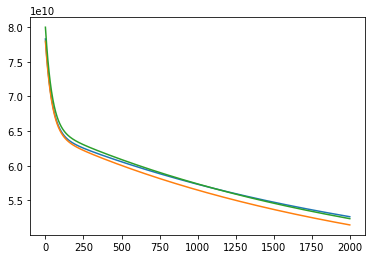

In [25]:
lambda_ = 0.5
alpha = 0.01
iterations = 2000
thetatest=0

kf = KFold(n_splits=3) # Define the split - into 2 folds 
kf.get_n_splits(data_norm) # returns the number of splitting iterations in the cross-validator
print(kf) 
for train_index, test_index in kf.split(data_norm):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_norm[train_index], data_norm[test_index]
    y_train, y_test = price[train_index], price[test_index]
    new_theta1, J_history1 = gradientDescentReg(X_train, y_train, theta, 0.1, alpha, iterations)
    new_theta2, J_history2 = gradientDescentReg(X_train, y_train, theta, 0.25, alpha, iterations)
    new_theta3, J_history3 = gradientDescentReg(X_train, y_train, theta,0.5 , alpha, iterations)
    R=min(J_history1[len(J_history1)-1],J_history2[len(J_history2)-1],J_history3[len(J_history3)-1])
    if(R==J_history1[len(J_history1)-1]):
        J_history=J_history1
        lambda_=0.1
        thetatest=new_theta1
    elif(R==J_history2[len(J_history2)-1]):
        J_history=J_history1
        lambda_=0.25
        thetatest=new_theta2
    else:
        J_history=J_history2
        lambda_=0.5
        thetatest=new_theta3
    print("Train Cost :",J_history[len(J_history)-1])
    plt.plot(np.arange(iterations),J_history)
    new_thetat, J_historyt = gradientDescentReg(X_test, y_test, thetatest, lambda_, alpha, iterations)
    print("Test Cost :",J_historyt[len(J_historyt)-1])
